# Black-Scholes Option Pricing

$\textbf{Mathematical Background}$

We assume we have a risk free asset, such as a bond, that satisfies the ordinary differential equation

$$dB(t) = rB(t)dt$$, 
$$B(0)=1$$
implying $$B(t) = e^{rt}$$


The model also has a stock which satisfies the stochastic differential equation

$$dS(t) = \mu S(t)dt + \sigma S(t)dW(t)$$
where W represents geometric Brownian motion.

Ito's rule tells us that the following is a valid expression for S at time u
$$S(u) = S(t) e^{(\mu - \frac{1}{2}\sigma^2)(u-t) + \sigma[W(u) - W(t)]}$$

We assume that the price of a European call option is a function of time and price of underlying $C(t, S(t))$. Using Ito's lemma we find

$$dC = \left[\frac{\partial C}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 C}{\partial S^2} + \mu S \frac{\partial C}{\partial S}\right]dt + \sigma S \frac{\partial C}{\partial S}dW$$


The self financing condition says
$$dX(t) = \frac{\pi(t)}{S(t)}dS(t) + \frac{X(t) - \pi(t)}{B(t)}dB(t)$$

where $\pi(t)$ is amount invested in stock at time t. Plugging in ODE for riskless asset and SDE for risky asset, we obtain

$$dX = \left[rX + (\mu-r)\pi\right]dt + \sigma \pi dW$$


If we have replicated the option payoff, then $dX=dC$. We need the $dt$ terms and the $dW$ terms to be equal.

We find the number of shares needs to equal the option delta
$$\frac{\pi(t)}{S(t)} = \frac{\partial C(t,S(t))}{\partial S}$$
Using this and comparing $dt$ terms, we find the Black Scholes PDE
$$\frac{\partial C}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 C}{\partial S^2} + r\left( S\frac{\partial C}{\partial S} - C \right)=0$$

subject to boundary condition

$$C(T, S)=g(S)$$

where $g(S)$ is the option payoff at time T.



For a European call option, $g(S) = max(S-k, 0)$, and for this payoff there exists an exact solution for the PDE

$$ C(t, S(t)) = S(t)N(d_1) - ke^{-r(T-t)}N(d_2) $$

where $N(x)$ is the cumulative normal distribution function given by $ N(x) = P[z\leq x] = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{y^2}{2}} dy $

and 

$$ d_1 = \frac{1}{\sigma \sqrt{T-t}} \left[ log\left( \frac{S(t)}{k} \right) + \left( r + \frac{\sigma^2}{2} \right)(T-t) \right]$$

$$ d_2 = d_1 - \sigma \sqrt{T-t}$$



For a European put option the price is governed by the equation

$$P(t, S(t)) = k e^{-r(T-t)} N(-d_2) - S(t) N(-d_1)$$


For both equations,

r is the continuous annualised risk-free rate

k is the option strike price

S(t) is the stock price at time t

T is the time of maturity

$\sigma$ is the standard deviation of the stock's returns, a measure of its volatility

In [3]:
#call and put price functions

import numpy as np
from scipy import stats
from scipy.stats import norm

def call_option_price(S, k, tau, r, sigma):
    '''
    Returns the cost of a European call option given a series of inputs
    
    S: Current Stock Price
    k: Strike Price
    tau: Time to Maturity
    r: Risk-Free Interest Rate (annualised)
    sigma: Volatility (annualized standard deviation of stock's returns)
    '''
    d_1 = (np.log(S/k) + ((r+((sigma**2)/(2)))*tau))/(sigma*np.sqrt(tau))
    d_2 = d_1 - (sigma * np.sqrt(tau))
    C = (S*norm.cdf(d_1, loc=0, scale=1)) - (k*np.exp(-r*tau)*norm.cdf(d_2, loc=0, scale=1))

    return C


def put_option_price(S, k, tau, r, sigma):
    '''
    Returns the cost of a European call option given a series of inputs
    
    S: Current Stock Price
    k: Strike Price
    tau: Time to Maturity
    r: Risk-Free Interest Rate (annualised)
    sigma: Volatility (annualized standard deviation of stock's returns)
    '''
    d_1 = (np.log(S/k) + ((r+((sigma**2)/(2)))*tau))/(sigma*np.sqrt(tau))
    d_2 = d_1 - (sigma * np.sqrt(tau))
    P = -(S*norm.cdf(-d_1, loc=0, scale=1)) + (k*np.exp(-r*tau)*norm.cdf(-d_2, loc=0, scale=1))

    return P

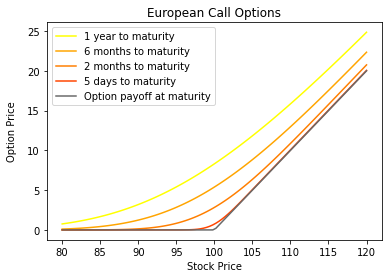

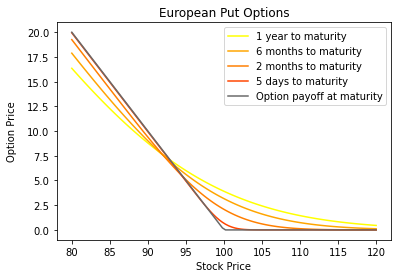

<Figure size 432x288 with 0 Axes>

In [4]:
#Call and put prices for varying underlying asset price. As the option nears maturity it can be seen that the option price tends towards the payoff at maturity, intuitively.

import matplotlib.pyplot as plt

stock_prices = np.linspace(80, 120, 100)

call_prices_1year = call_option_price(stock_prices, 100, 1, 0.045, 0.15)
call_prices_6month = call_option_price(stock_prices, 100, 0.5, 0.045, 0.15)
call_prices_2month = call_option_price(stock_prices, 100, 0.1666666, 0.045, 0.15)
call_prices_5day = call_option_price(stock_prices, 100, 0.01369863, 0.045, 0.15)

put_prices_1year = put_option_price(stock_prices, 100, 1, 0.045, 0.15)
put_prices_6month = put_option_price(stock_prices, 100, 0.5, 0.045, 0.15)
put_prices_2month = put_option_price(stock_prices, 100, 0.1666666, 0.045, 0.15)
put_prices_5day = put_option_price(stock_prices, 100, 0.01369863, 0.045, 0.15)



#call options with strike price of 100, risk free rate of 4.5%, and volatility of 15%
call_payoff=np.array([])
for i in stock_prices:
    call_payoff = np.append(call_payoff, max(0, i-100))
    

colours = ['#FFFF00', '#FFA500', '#FF7F00', '#FF4500', '#FF0000']

plt.plot(stock_prices, call_prices_1year, label='1 year to maturity', color=colours[0])
plt.plot(stock_prices, call_prices_6month, label='6 months to maturity', color=colours[1])
plt.plot(stock_prices, call_prices_2month, label='2 months to maturity', color=colours[2])
plt.plot(stock_prices, call_prices_5day, label='5 days to maturity', color=colours[3])
plt.plot(stock_prices, call_payoff, label='Option payoff at maturity', color='dimgrey')

plt.title("European Call Options")
plt.xlabel("Stock Price")
plt.ylabel("Option Price", rotation=90, labelpad=10)

plt.legend()
plt.show()
plt.clf()



#put options with strike price of 100, risk free rate of 4.5%, and volatility of 15%
put_payoff=np.array([])
for i in stock_prices:
    put_payoff = np.append(put_payoff, max(0, 100-i))

colours = ['#FFFF00', '#FFA500', '#FF7F00', '#FF4500', '#FF0000']

plt.plot(stock_prices, put_prices_1year, label='1 year to maturity', color=colours[0])
plt.plot(stock_prices, put_prices_6month, label='6 months to maturity', color=colours[1])
plt.plot(stock_prices, put_prices_2month, label='2 months to maturity', color=colours[2])
plt.plot(stock_prices, put_prices_5day, label='5 days to maturity', color=colours[3])
plt.plot(stock_prices, put_payoff, label='Option payoff at maturity', color='dimgrey')

plt.title("European Put Options")
plt.xlabel("Stock Price")
plt.ylabel("Option Price", rotation=90, labelpad=10)

plt.legend()
plt.show()
plt.clf()



European option with strike price  100 , maturing in  1  years, with annualised continuous risk free rate of  0.05 .


Text(531.1090909090908, 0.5, 'Volatility')

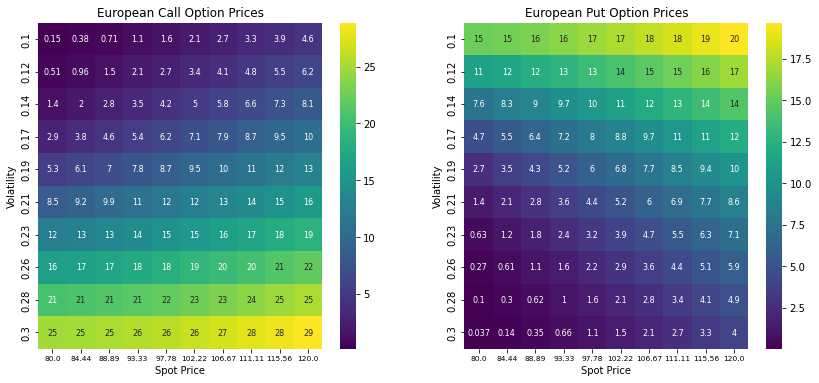

In [5]:
#Call and put price heatmaps, given Black-Scholes parameters and minimum/maximum spot price and volatility.

import tkinter as tk
import seaborn as sns

k = 100
tau = 1
r = 0.05

min_spot = 80
max_spot = 120

min_vol = 0.1
max_vol = 0.3

spots = np.linspace(min_spot, max_spot, 10)
vols = np.linspace(min_vol, max_vol, 10)


call_prices = np.zeros((len(spots), len(vols)))
put_prices = np.zeros((len(spots), len(vols)))

#0,0 is call_option_price with 0th spot price and 0th volatility
#4, 6 is call option price with 4th spot price and 6th volatility

for i, spot in enumerate(spots):
    for j, vol in enumerate(vols):
        call_prices[i,j] = call_option_price(spot, k, tau, r, vol)
        put_prices[i,j] = put_option_price(spot, k, tau, r, vol)


        
print("European option with strike price ", k, ", maturing in ", tau, " years, with annualised continuous risk free rate of ", r, ".")
        
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(np.round(call_prices, 3), annot=True, annot_kws={"size": 8}, xticklabels=np.round(spots, 2), yticklabels=np.round(vols,2), cmap='viridis')
plt.xticks(rotation=0,fontsize=7.5)
plt.title('European Call Option Prices')
plt.xlabel('Spot Price')
plt.ylabel('Volatility')

plt.subplot(1, 2, 2)
sns.heatmap(np.round(put_prices, 3), annot=True, annot_kws={"size": 8}, xticklabels=np.round(spots, 2), yticklabels=np.round(vols,2), cmap='viridis')
plt.xticks(rotation=0,fontsize=7.5)
plt.title('European Put Option Prices')
plt.xlabel('Spot Price')
plt.ylabel('Volatility')

 $\textbf{Implied Volatility}$

The volatility used in the Black-Scholes formula is forward looking - when pricing options we must try to estimate the future volatility of the underlying asset. By looking at current market prices, we can work out the 'implied volatility' of the underlying asset - the volatility, should it be input into the Black-Scholes formula, that would output the market option price.

Below is a function that takes input for the stock ticker (e.g. 'MSFT') and the option expiration date (in format 'YYYY-MM-DD'), and looks at current market option prices for this underlying. It numerically calculates (using Powell's method) the implied volatility for each option with the given expiry, plots the implied volatility against the strike price to enable visualisation of the volatility smile, and finally returns a dataframe containing the calculated implied volatilities.

The function works for non-dividend paying stocks. It allows input for the risk-free rate, however if left blank it will retreive this information from current US treasury yields based on the time to option maturity.

('2024-10-18', '2024-10-25', '2024-11-01', '2024-11-08', '2024-11-15', '2024-11-22', '2024-11-29', '2024-12-20', '2025-01-17', '2025-02-21', '2025-03-21', '2025-04-17', '2025-06-20', '2025-08-15', '2025-09-19', '2025-12-19', '2026-01-16', '2026-06-18', '2026-12-18', '2027-01-15')


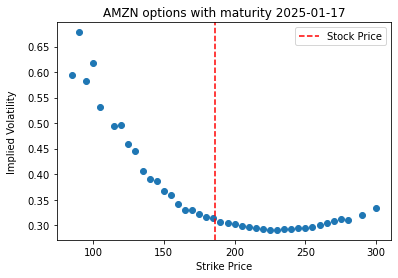

,strike,option_price,implied_volatility
0,45.0,141.875,NaN
1,50.0,136.775,NaN
2,55.0,132.025,NaN
3,60.0,127.100,NaN
4,65.0,122.025,NaN
5,70.0,117.250,NaN
6,75.0,112.375,NaN
7,80.0,107.325,NaN
8,85.0,102.350,0.593903
9,90.0,97.600,0.678066


<Figure size 432x288 with 0 Axes>

In [50]:
import yfinance as yf
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime, timedelta
import scipy.optimize


'''
Be aware, sometimes the yfinance module doesn't have any information available, so the function will throw an error.
If option dates are accessed but function still throws a KeyError, this means there is not enough price data available to run
the function. Use the subsequent code cell to find which dates have available data.
'''


def implied_volatilities(stock_ticker, expiration_date, r):
    '''
    Given a stock ticker and an option maturity date, function will access current option data, calculate implied volatilities
    for different option strike prices, plot the observed volatility smile, and return the calculated option data.
    '''
    
    #downloads stock ticker and option expiration dates
    stock = yf.Ticker(stock_ticker)
    
    
    #checks whether option exists with the given expiration date, if not throw an error
    expiration_dates = stock.options
    if expiration_date not in expiration_dates:
        raise ValueError("Option doesn't exist with given expiration date, or date in wrong format")
    
    
    
    #calculates the time to maturity in years based on todays date and the expiration date
    time_to_maturity = (datetime.strptime(expiration_date, "%Y-%m-%d").date() - datetime.now().date()).days / 365.25
    
    #finds today's stock price
    stock_price = stock.history(period='1d')['Close'].iloc[0]
    
        
                 
    #if r is not given, this calculates r based on time to maturity and current US treasury yields
    #if numerical r is given, if statement never executes and input value remains
    if not (isinstance(r, float) or isinstance(r, int)):
        
        if time_to_maturity <= 0.375:
            r = web.DataReader('DTB3', 'fred', datetime.now() - timedelta(days=7), datetime.now()).iloc[-1].values[0] * 0.01
        elif time_to_maturity <= 0.75:
            r = web.DataReader('DTB6', 'fred', datetime.now() - timedelta(days=7), datetime.now()).iloc[-1].values[0] * 0.01
        elif time_to_maturity <= 1.5:
            r = web.DataReader('DGS1', 'fred', datetime.now() - timedelta(days=7), datetime.now()).iloc[-1].values[0] * 0.01
        elif time_to_maturity <= 3.5:
            r = web.DataReader('DGS2', 'fred', datetime.now() - timedelta(days=7), datetime.now()).iloc[-1].values[0] * 0.01
        elif time_to_maturity <= 7.5:
            r = web.DataReader('DGS5', 'fred', datetime.now() - timedelta(days=7), datetime.now()).iloc[-1].values[0] * 0.01
        elif time_to_maturity <= 15:
            r = web.DataReader('DGS10', 'fred', datetime.now() - timedelta(days=7), datetime.now()).iloc[-1].values[0] * 0.01
        elif time_to_maturity <= 25:
            r = web.DataReader('DGS20', 'fred', datetime.now() - timedelta(days=7), datetime.now()).iloc[-1].values[0] * 0.01
        elif time_to_maturity > 25:
            r = web.DataReader('DGS30', 'fred', datetime.now() - timedelta(days=7), datetime.now()).iloc[-1].values[0] * 0.01

            
            
            
            
    # Makes dataframe from the available option chain, discards options with no bid or as price - if only a bid or an ask price
    # available, this is given as option price, if both bid and ask are available option price set as the midpoint. Final
    # dataframe set to have columns for strike and option price.
    
    data = stock.option_chain(expiration_date).calls[['strike', 'bid', 'ask']].copy()[(stock.option_chain(expiration_date).calls['bid'] > 0) | (stock.option_chain(expiration_date).calls['ask'] > 0)]
    data['option_price'] = np.where(
    (data['bid'] == 0) & (data['ask'] == 0),      # Both bid and ask are 0
    np.nan,                                  # Set option price to NaN
    np.where(
        data['bid'] == 0,                      # If bid is 0
        data['ask'],                           # Take the ask price
        np.where(
            data['ask'] == 0,                  # If ask is 0
            data['bid'],                       # Take the bid price
            (data['bid'] + data['ask']) / 2     # Both are non-zero, take average
        )))
    data = data[['strike', 'option_price']]
    
    
    
    
    
    # Calculates implied volatility using Powell's numerical method and the Black-Scholes option pricing function.
    def error(row):
        
        def vol_call_option_price(sigma):
            return call_option_price(stock_price, row['strike'], time_to_maturity, r, sigma) - row['option_price']

        roots = scipy.optimize.root(vol_call_option_price, x0=0.2)
        if roots['success']:
            return roots['x'][0]

        return np.nan
    
    
    # Calculates implied volatility on each row of the dataframe and stores value in new column.
    data['implied_volatility'] = data.apply(error, axis=1) 
    
    
    
    # Plots implied volatility against strike price, displaying the underlying asset price.
    plt.scatter(data['strike'], data['implied_volatility'])
    plt.axvline(x=stock_price, color='r', linestyle='--', label='Stock Price')

    plt.title(f"{stock_ticker} options with maturity {expiration_date}")
    plt.xlabel("Strike Price")
    plt.ylabel("Implied Volatility", rotation=90, labelpad=10)
    plt.legend()

    plt.show()
    plt.clf()
    
    return data




dates = yf.Ticker('AMZN').options
print(dates)
#pick an expiration date that works



implied_volatilities("AMZN", dates[8], r=None)

![Alt Text](implied_volatility_example_plot.png)

The plot above illustrates the volatility smile for Amazon's options, highlighting how implied volatility varies across different strike prices. Typically, the smile exhibits higher implied volatility for deep out-of-the-money (OTM) and in-the-money (ITM) options compared to at-the-money (ATM) options. This phenomenon occurs because investors often perceive greater risk associated with extreme price movements. For Amazon, the skew in the smile may indicate that market participants are pricing in heightened uncertainty or bearish sentiment, possibly driven by recent earnings reports or broader market trends.

In [30]:
# This function is used in tandem with the previous volatility function.
# Given a stock ticker, it checks which call option chains have available price data.

stock = yf.Ticker('AMZN')
dates = stock.options
print(dates)
#pick an expiration date that works


for i in dates:
    data = stock.option_chain(i).calls[(stock.option_chain(i).calls['bid'] > 0) | (stock.option_chain(i).calls['ask'] > 0)][['strike', 'bid', 'ask']]
    
    if data.empty:
        print(i, 'option maturity data unavailable!')
    
    else:
        print(i, 'option maturity data available, with', data.shape[0], 'rows!')
        
    print()

('2024-10-18', '2024-10-25', '2024-11-01', '2024-11-08', '2024-11-15', '2024-11-22', '2024-11-29', '2024-12-20', '2025-01-17', '2025-02-21', '2025-03-21', '2025-04-17', '2025-06-20', '2025-08-15', '2025-09-19', '2025-12-19', '2026-01-16', '2026-06-18', '2026-12-18', '2027-01-15')
2024-10-18 option maturity data unavailable!

2024-10-25 option maturity data unavailable!

2024-11-01 option maturity data unavailable!

2024-11-08 option maturity data unavailable!

2024-11-15 option maturity data unavailable!

2024-11-22 option maturity data unavailable!

2024-11-29 option maturity data unavailable!

2024-12-20 option maturity data unavailable!

2025-01-17 option maturity data unavailable!

2025-02-21 option maturity data available, with 2 rows!

2025-03-21 option maturity data available, with 2 rows!

2025-04-17 option maturity data available, with 1 rows!

2025-06-20 option maturity data available, with 1 rows!

2025-08-15 option maturity data available, with 3 rows!

2025-09-19 option ma